# HIV Model -- Annie Chu

In [3]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

## Making System

In [4]:
def make_system(gamma, tau, mu, beta, alpha, rho, sigma, delta, pi):
    '''
    R = # of activated, uninfected CD4 lymphocytes
    L = # of latently infected cells
    E = # of actively infected cells
    V = # of free virions
    
    mu = HIV-independent death removal rate
    
    gamma = rate at which new, uninfected CD4 lymphocytes arise
    tau = proportion that are activated 

    rho = proportion of cells become latently infected
    alpha = activation rate from L to E
    
    
    R rises at rate = gamma x tau = Rbegin
    R becomes L at rate = beta x V = RtoL
    R dies at rate = mu = Rdeath
    dR/dt = (Rbegin) - (mu x R) - (RtoL x R)
    
    gamma = 1.36
    mu = 1.36 x 10 -3
    tau = 0.2
    beta = 0.00027
    rho = 0.1
    alpha = 0.036
    sigma = 2
    delta = 0.33
    pi = 100
    
    '''
    init = State(R=200, L=0, E=0, V=100)
    t0 = 0
    t_end = 120
    dt = 0.5
    return System(init=init, t0 = 0, t_end = t_end, dt = dt, gamma=gamma, 
                  tau=tau, mu=mu, beta=beta,
                  alpha=alpha, rho=rho, sigma=sigma, 
                  delta=delta, pi=pi)

In [5]:
def update_func(state, t, system):
    R, L, E, V = state
    unpack(system)
    
    dRdt = (gamma * tau) - (mu * R) - (beta * R * V)
    dLdt = (rho * beta * R * V) - (mu * L) - (alpha * L)
    dEdt = ((1-rho) * beta * R * V) + (alpha * L) - (delta * E)
    dVdt = (pi * E) - (sigma * V)
    
    R += dRdt * dt
    L += dLdt * dt
    E += dEdt * dt
    V += dVdt * dt
    
    return State(R=R, L=L, E=E, V=V)

In [6]:
system = make_system(1.36, 0.2, 0.00136, 0.00027, 0.036, 0.1, 2, 0.33, 100)

,values
init,R 200 L 0 E 0 V 100 dtype: int64
t0,0
t_end,120
dt,0.5
gamma,1.36
tau,0.2
mu,0.00136
beta,0.00027
alpha,0.036
rho,0.1


In [7]:
def run_simulation(system, update_func):
    unpack(system)
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    for t in linrange(t0, t_end, dt):
        frame.row[t+dt] = update_func(frame.row[t], t, system)
        
    return frame

In [8]:
results = run_simulation(system, update_func)

,R,L,E,V
0.0,200,0,0,100
0.5,197.3,0.27,2.43,0
1.0,197.302,0.264956,2.03391,121.5
1.5,194.067,0.583631,4.6157,101.695
2.0,191.407,0.839162,6.26252,230.785
2.5,185.449,1.41983,10.6114,313.126
3.0,177.62,2.17724,15.9415,530.572
3.5,164.913,3.40882,24.8005,797.075
4.0,147.191,5.11969,36.7407,1240.03
4.5,122.587,7.48808,52.9469,1837.04


In [9]:
def plot_results(R,L,E):
    plot(R, 'm-', label = "R")
    plot(L, 'g:', label = "L")
    plot(E, 'b-', label = "E")
    decorate(title = "HIV",
            xlabel = "Time",
            ylabel = "Number of Cells")

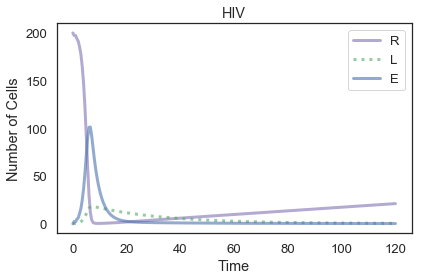

In [10]:
plot_results(results.R,results.L,results.E)